# Agenda for live-coding demo

You can see this at https://github.com/reuven/cisco-iyl

1. Loading data into Pandas
2. Selective loading of data
3. Selecting rows
4. Selecting columns
5. Grouping
6. Visualizing
7. Dates and times

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [4]:
# Load data from 10,000 NYC taxi rides in 1995 

df = pd.read_csv('taxi.csv')

In [5]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.00,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.00,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.00,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.00,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
5,1,2015-06-02 11:19:33,2015-06-02 11:28:48,1,1.40,-73.944641,40.779465,1,N,-73.961365,40.771561,1,8.0,0.0,0.5,1.75,0.00,0.3,10.55
6,1,2015-06-02 11:19:34,2015-06-02 11:38:46,1,1.80,-73.992867,40.748211,1,N,-73.969772,40.748459,1,12.5,0.0,0.5,3.00,0.00,0.3,16.30
7,1,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,-73.863075,40.769253,1,N,-73.986710,40.761307,1,52.5,0.0,0.5,15.00,5.54,0.3,73.84
8,2,2015-06-02 11:19:36,2015-06-02 11:45:19,1,1.27,-73.991432,40.749306,1,N,-73.985062,40.759525,2,15.0,0.0,0.5,0.00,0.00,0.3,15.80
9,1,2015-06-02 11:19:38,2015-06-02 11:23:50,1,0.60,-73.970734,40.796207,1,N,-73.977470,40.789509,1,5.0,0.0,0.5,0.50,0.00,0.3,6.30


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               9999 non-null   int64  
 1   tpep_pickup_datetime   9999 non-null   object 
 2   tpep_dropoff_datetime  9999 non-null   object 
 3   passenger_count        9999 non-null   int64  
 4   trip_distance          9999 non-null   float64
 5   pickup_longitude       9999 non-null   float64
 6   pickup_latitude        9999 non-null   float64
 7   RateCodeID             9999 non-null   int64  
 8   store_and_fwd_flag     9999 non-null   object 
 9   dropoff_longitude      9999 non-null   float64
 10  dropoff_latitude       9999 non-null   float64
 11  payment_type           9999 non-null   int64  
 12  fare_amount            9999 non-null   float64
 13  extra                  9999 non-null   float64
 14  mta_tax                9999 non-null   float64
 15  tip_

In [7]:
df = pd.read_csv('taxi.csv',
                usecols=['tpep_pickup_datetime',
                        'tpep_dropoff_datetime',
                        'passenger_count',
                        'trip_distance',
                        'total_amount'])

In [8]:
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30
5,2015-06-02 11:19:33,2015-06-02 11:28:48,1,1.40,10.55
6,2015-06-02 11:19:34,2015-06-02 11:38:46,1,1.80,16.30
7,2015-06-02 11:19:35,2015-06-02 12:36:46,4,11.90,73.84
8,2015-06-02 11:19:36,2015-06-02 11:45:19,1,1.27,15.80
9,2015-06-02 11:19:38,2015-06-02 11:23:50,1,0.60,6.30


In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   9999 non-null   object 
 1   tpep_dropoff_datetime  9999 non-null   object 
 2   passenger_count        9999 non-null   int64  
 3   trip_distance          9999 non-null   float64
 4   total_amount           9999 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7 MB


In [10]:
df.shape

(9999, 5)

In [11]:
# how much did people pay for rides in taxis
df['total_amount']

0       17.80
1        8.30
2       11.00
3       17.16
4       10.30
        ...  
9994    12.30
9995    20.30
9996    22.30
9997     7.80
9998    26.75
Name: total_amount, Length: 9999, dtype: float64

In [12]:
# what was the average amount people paid?
df['total_amount'].mean()

17.552472247224728

In [13]:
# what was the standard deviation on that data?
df['total_amount'].std()

15.137989797051127

In [14]:
# we can summarize a column with the "describe" method

df['total_amount'].describe()

count    9999.000000
mean       17.552472
std        15.137990
min        -7.800000
25%         8.800000
50%        12.800000
75%        19.800000
max       252.350000
Name: total_amount, dtype: float64

In [15]:
# what if I want to describe all of the columns together?
# I can run "describe" on the entire data frame!

df.describe()

,passenger_count,trip_distance,total_amount
count,9999.000000,9999.000000,9999.000000
mean,1.659466,3.158511,17.552472
std,1.333306,4.037516,15.137990
min,0.000000,0.000000,-7.800000
25%,1.000000,1.000000,8.800000
50%,1.000000,1.700000,12.800000
75%,2.000000,3.300000,19.800000
max,6.000000,64.600000,252.350000


In [16]:
# how many rides had 1 passenger, 2 passengers, 3 passengers, etc.?

df['passenger_count'].value_counts()

1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: passenger_count, dtype: int64

In [17]:
df['passenger_count'].value_counts(normalize=True)

1    0.720772
2    0.131313
5    0.052005
3    0.040604
6    0.036904
4    0.018202
0    0.000200
Name: passenger_count, dtype: float64

In [19]:
# how many rides did people take in which the total_amount was < 0?

df.loc[df['total_amount'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
2903,2015-06-02 11:24:35,2015-06-02 11:24:40,1,0.00,-3.3
5719,2015-06-04 15:17:15,2015-06-04 15:26:40,1,0.89,-7.8
9276,2015-06-01 00:09:21,2015-06-01 00:14:43,1,0.93,-7.3


In [21]:
# how far did people go, on average, when they paid < 0?

df.loc[df['total_amount'] < 0, 'trip_distance'].mean()

0.6066666666666667

In [22]:
# what was the average total_amount for 1 passenger?
df.loc[df['passenger_count'] == 1, 'total_amount'].mean()

17.368569446371584

In [23]:
df.loc[df['passenger_count'] == 2, 'total_amount'].mean()

18.406306169078444

In [24]:
df.loc[df['passenger_count'] == 3, 'total_amount'].mean()

17.99470443349754

In [25]:
# we can do this with a "groupby" call.
# very similar to what you can do in SQL!

# for each value of passenger_count,
# show me the mean of total_amount

df.groupby('passenger_count')['total_amount'].mean()

passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [26]:
# we can get trip_distance and total_amount
df.groupby('passenger_count')[['trip_distance', 'total_amount']].mean()

,trip_distance,total_amount
passenger_count,,
0,4.600000,25.570000
1,3.092338,17.368569
2,3.384387,18.406306
3,3.342389,17.994704
4,3.628901,18.881648
5,3.182712,17.211269
6,3.170976,17.401355


In [27]:
# we can get trip_distance and total_amount
# I can ask for the mean + std, as well!
df.groupby('passenger_count')[['trip_distance', 'total_amount']].agg(['mean', 'std'])

trip_distance           total_amount           
                         mean       std         mean        std
passenger_count                                                
0                    4.600000  4.666905    25.570000  15.301791
1                    3.092338  4.020187    17.368569  15.286692
2                    3.384387  4.242826    18.406306  15.612365
3                    3.342389  3.822041    17.994704  13.717839
4                    3.628901  4.351369    18.881648  15.097867
5                    3.182712  3.969468    17.211269  14.031953
6                    3.170976  3.759807    17.401355  13.363827

In [28]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,17.80
1,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,8.30
2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,11.00
3,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,17.16
4,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,10.30


In [29]:
df['passenger_count'].value_counts()

1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: passenger_count, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

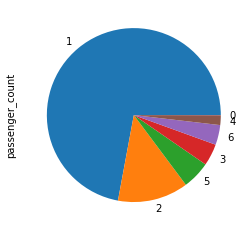

In [30]:
df['passenger_count'].value_counts().plot.pie()